<a href="https://colab.research.google.com/github/jramire77468/ML2/blob/main/Actividad3ML2JuanRamirez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning II

## Actividad 3

### Juan Felipe Ramírez Botero

## Aplicación Práctica de Redes Neuronales Convolucionales (CNN)

### 1. Carga de datos

In [1]:
# Carga del dataset y sus conjuntos de entrenamiento y prueba
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 2. Preprocesamiento

In [2]:
# importar to_categorical
from keras.utils import to_categorical

# Escalar datos entre 0 y 1
x_train = train_X.astype("float32") / 255.0
x_test = test_X.astype("float32") / 255.0

# conversión matricial de las imágenes

x_train = x_train.reshape(-1, 28,28, 1)
x_test = x_test.reshape(-1, 28,28, 1)

# One hot encoding de las clases

y_train = to_categorical(train_Y, 10)
y_test = to_categorical(test_Y, 10)


### 3. Construcción de la red CNN

In [3]:
#importar librerías para la construcción del modelo
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Construcción del Modelo
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

# resumen
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

### 4. Entrenamiento del modelo

In [4]:
# importar optimizador adam para compilar el modelo
from tensorflow.keras.optimizers import Adam

# compilar modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# entrenamiento
fashion_model = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=7,
    batch_size=64,
    verbose=1
)


Epoch 1/7
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.7740 - loss: 0.7020 - val_accuracy: 0.8781 - val_loss: 0.3533
Epoch 2/7
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.8823 - loss: 0.3388 - val_accuracy: 0.8839 - val_loss: 0.3284
Epoch 3/7
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.8935 - loss: 0.3021 - val_accuracy: 0.8938 - val_loss: 0.3028
Epoch 4/7
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9056 - loss: 0.2682 - val_accuracy: 0.8965 - val_loss: 0.2930
Epoch 5/7
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9076 - loss: 0.2594 - val_accuracy: 0.9016 - val_loss: 0.2789
Epoch 6/7
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9134 - loss: 0.2439 - val_accuracy: 0.8974 - val_loss: 0.2889
Epoch 7/7
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9176 - loss: 0.2315 - val_accuracy: 0.8983 - val_loss: 0.2876


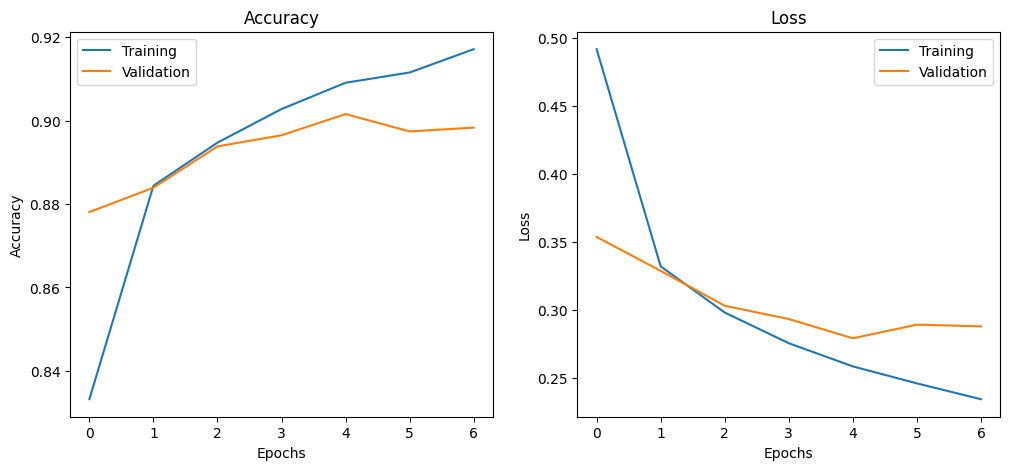

In [5]:
#importar matplotlib para graficar el desempeño

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# gráfico de accuracy
plt.subplot(1, 2, 1)
plt.plot(fashion_model.history['accuracy'], label='Training')
plt.plot(fashion_model.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# gráfico de loss
plt.subplot(1, 2, 2)
plt.plot(fashion_model.history['loss'], label='Training')
plt.plot(fashion_model.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 5. Evaluación y análisis

In [6]:
#Evaluación del modelo
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8954 - loss: 0.3044


[0.3032817244529724, 0.8919000029563904]

#### 5.1 Comentario sobre el desempeño del modelo

El modelo tuvo un buen desempeño en general, alcanzando un puntaje de accuracy de 89.5% en el conjunto de prueba. Sin embargo, el valor de loss en el conjunto de prueba fue el más alto, con 0.3044, comparado con 0.2315 en entrenamiento y 0.2876 en validación. Además, se observa una leve diferencia entre la accuracy de entrenamiento (91.76%) y validación (89.83%), así como una diferencia más notable en el loss entre entrenamiento (0.2315) y validación (0.2876). Lo anterior indica que se dio un leve sobreajuste y que el modelo podría mejorar aplicando técnicas como regularización o Dropout.

### 6. Reto Opcional: Mejora con Regularización

In [8]:
# importar dropout
from keras.layers import Dropout

#modelo con regularización
model_reg = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Resumen
model_reg.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compilar modelo con regularización
model_reg.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento modelo con regularización
history_reg = model_reg.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=7,
    batch_size=64,
    verbose=1
)

Epoch 1/7
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 56ms/step - accuracy: 0.8391 - loss: 0.4453 - val_accuracy: 0.8764 - val_loss: 0.3393
Epoch 2/7
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 55ms/step - accuracy: 0.8663 - loss: 0.3696 - val_accuracy: 0.8886 - val_loss: 0.2991
Epoch 3/7
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.8781 - loss: 0.3329 - val_accuracy: 0.8937 - val_loss: 0.2822
Epoch 4/7
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.8887 - loss: 0.3101 - val_accuracy: 0.8964 - val_loss: 0.2784
Epoch 5/7
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 58ms/step - accuracy: 0.8943 - loss: 0.2957 - val_accuracy: 0.9023 - val_loss: 0.2616
Epoch 6/7
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 0.8992 - loss: 0.2740 - val_accuracy: 0.9007 - val_loss: 0.2685
Epoch 7/7
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9027 - loss: 0.2675 - val_accuracy: 0.9057 - val_loss: 0.2580


In [12]:
# evaluar modelo con reg
model_reg.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9012 - loss: 0.2758


[0.26867544651031494, 0.9027000069618225]

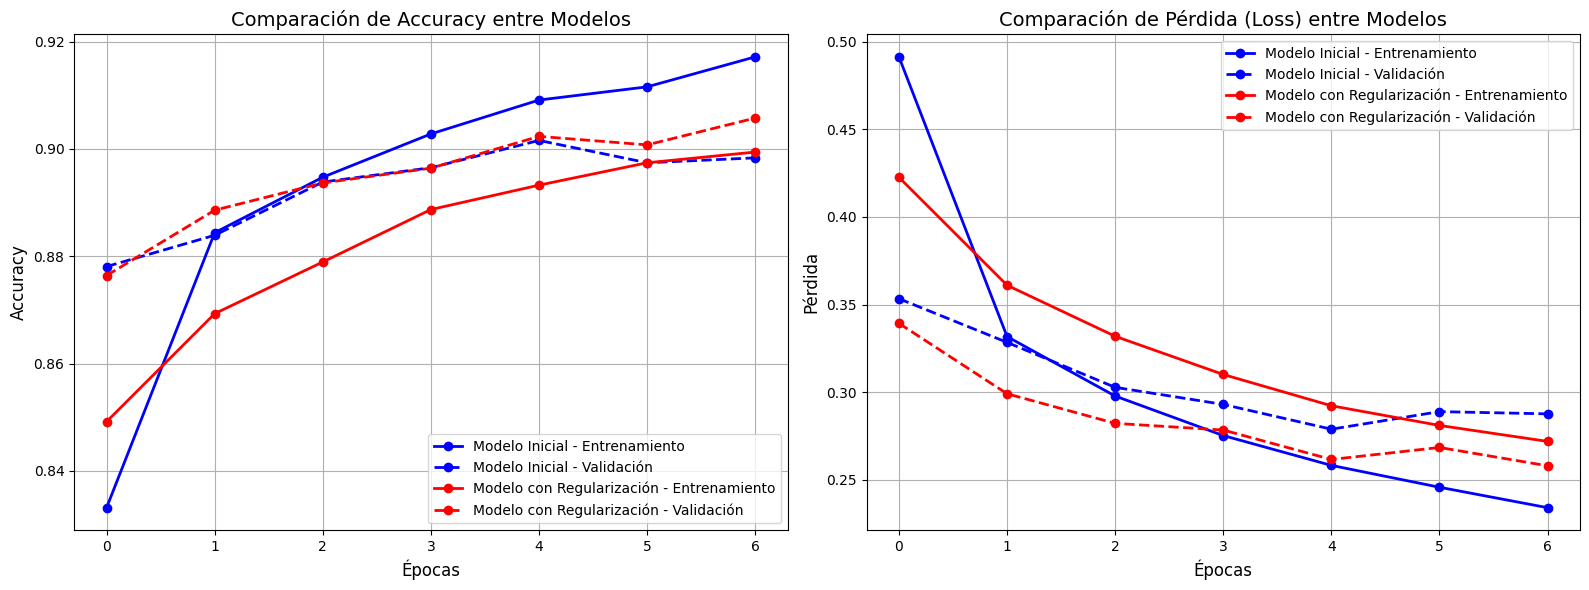

In [20]:
# gráficos comparativos

plt.figure(figsize=(16, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(fashion_model.history['accuracy'], 'bo-', label='Modelo Inicial - Entrenamiento', linewidth=2)
plt.plot(fashion_model.history['val_accuracy'], 'bo--', label='Modelo Inicial - Validación', linewidth=2)
plt.plot(history_reg.history['accuracy'], 'ro-', label='Modelo con Regularización - Entrenamiento', linewidth=2)
plt.plot(history_reg.history['val_accuracy'], 'ro--', label='Modelo con Regularización - Validación', linewidth=2)
plt.title('Comparación de Accuracy entre Modelos', fontsize=14)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True)
plt.legend(loc='lower right', fontsize=10)

# Loss
plt.subplot(1, 2, 2)
plt.plot(fashion_model.history['loss'], 'bo-', label='Modelo Inicial - Entrenamiento', linewidth=2)
plt.plot(fashion_model.history['val_loss'], 'bo--', label='Modelo Inicial - Validación', linewidth=2)
plt.plot(history_reg.history['loss'], 'ro-', label='Modelo con Regularización - Entrenamiento', linewidth=2)
plt.plot(history_reg.history['val_loss'], 'ro--', label='Modelo con Regularización - Validación', linewidth=2)
plt.title('Comparación de Pérdida (Loss) entre Modelos', fontsize=14)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Pérdida', fontsize=12)
plt.grid(True)
plt.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

### Interpretación gráfico comparación

El modelo inicial alcanzó un mayor puntaje de accuracy en entrenamiento, pero mostró una diferencia notable con respecto a la validación, lo que sugiere un leve sobreajuste. En contraste, el modelo con regularización presentó curvas de accuracy y loss más cercanas entre entrenamiento y validación, lo que indica una mejor capacidad de generalización. Aunque su accuracy final fue ligeramente menor, mostró un comportamiento más estable y equilibrado a lo largo de las épocas.

## Resumen final

En general, la adición de una segunda capa convolucional y la aplicación de Dropout ayudaron a controlar el sobreajuste y mejoraron la generalización del modelo. Si bien se sacrificó un poco de rendimiento en el conjunto de entrenamiento, el comportamiento en validación fue más consistente, lo que hace que el modelo con regularización sea más confiable para datos nuevos.

## Juan Felipe Ramírez
